In [10]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import os

# EDA "business.snappy.parquet"

In [11]:
#Obtener la ruta del archivo
file_path = '../data/Yelp/business.snappy.parquet'


In [12]:
# Lee el archivo Parquet en un DataFrame
df = pd.read_parquet(file_path, engine='pyarrow')
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,7PDi_iyik3jraDAzWwwR4Q,Chase JP Morgan Bank Credit Card Services,,Wilmington,FL,19850,39.749361,-75.643331,1.5,111,1,"Banks & Credit Unions, Financial Services"
1,FC6ef4rMMZKNov_-A9M6iQ,TD Bank Havertown,120 W Eagle Rd,Haverford,LA,19083,39.985661,-75.314844,1.5,6,1,"Banks & Credit Unions, Financial Services"
2,0QmgzzPVNHeNL76B8rwTKA,Beneficial Bank,1600 Chestnut St,Philadelphia,LA,19103,39.951154,-75.167335,2.5,5,0,"Banks & Credit Unions, Financial Services"
3,ZNfaufwJ0iug9Qz_mTluMw,Chase Bank,2001 N Dale Mabry Hwy,Tampa,PA,33607,27.959651,-82.505057,2.5,11,1,"Banks & Credit Unions, Financial Services"
4,PcDeBAT95JXyTBFeFvK7oA,Bank of America Financial Center,21725 Village Lakes Shopping Ctr Dr,Land O Lakes,IN,34639,28.189369,-82.457027,1.5,6,1,"Financial Services, Banks & Credit Unions"


In [13]:

# Importa las bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt

Top 10 Usuarios que Más se Repiten:
name
Bank of America Financial Center    94
Wells Fargo Bank                    74
Chase Bank                          72
TD Bank                             27
U.S. Bank Branch                    22
PNC Bank                            20
Suncoast Credit Union               15
Commerce Bank                       10
GTE Financial                       10
Navy Federal Credit Union            9
Name: count, dtype: int64


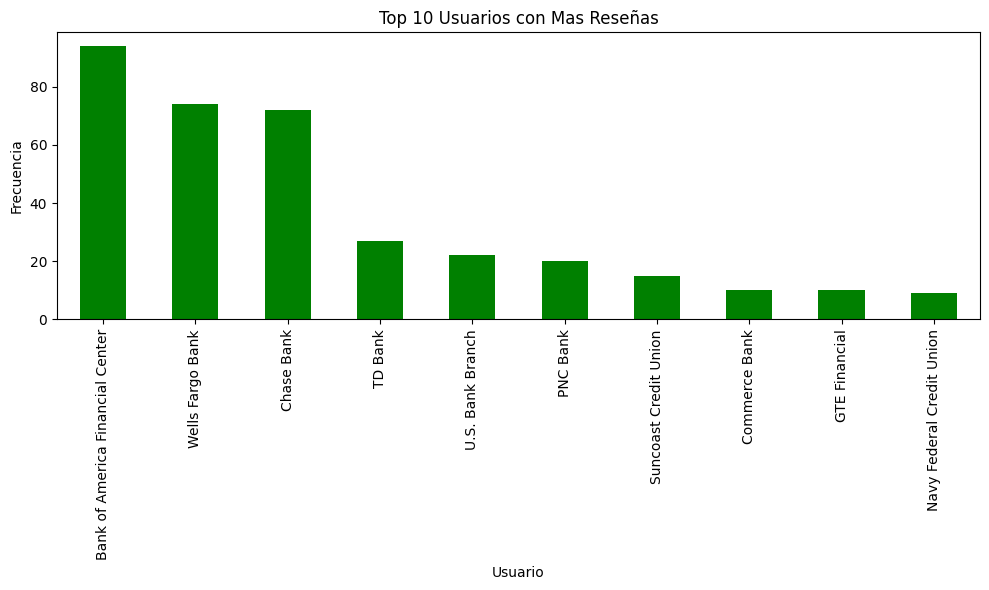

In [14]:
# #10 usuarios con más reseñas
# Calcula la cantidad de reseñas por usuario y obtén los 10 usuarios con más reseñas
name_counts = df['name'].value_counts()
top_users = name_counts.head(10)

# Muestra los 10 usuarios con más reseñas
print("Top 10 Usuarios que Más se Repiten:")
print(top_users)

# Crea un gráfico de barras para visualizar los 10 usuarios con más reseñas
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='green')
plt.xlabel('Usuario')
plt.ylabel('Frecuencia')
plt.title('Top 10 Usuarios con Mas Reseñas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

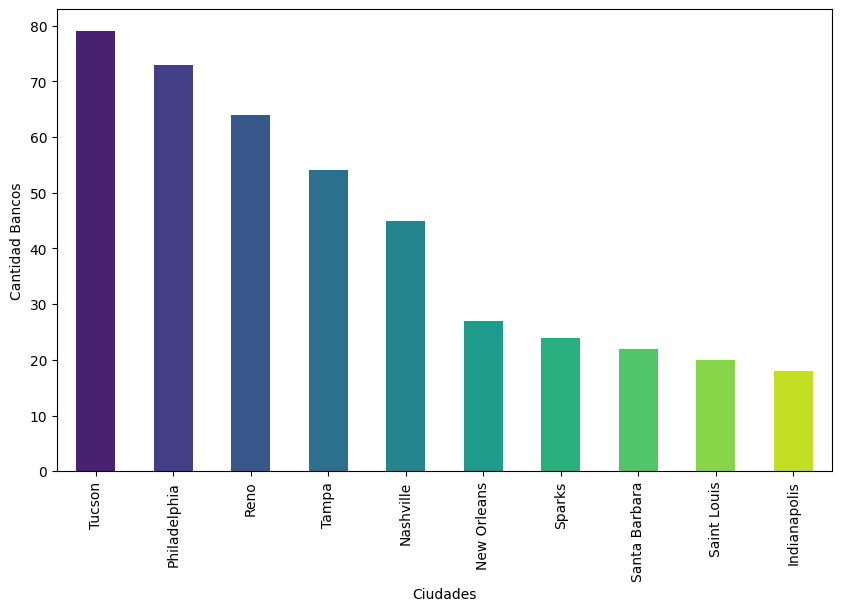

In [15]:
#Contar la cantidad de bancos por ciudad
city_counts = df['city'].value_counts()

# Selecciona las 10 ciudades principales
top_cities = city_counts.head(10)

# Define una paleta de colores verde utilizando Seaborn
green_palette = sns.color_palette("viridis", len(top_cities))

# Crea el gráfico de barras utilizando la paleta de colores verde
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color=green_palette)
plt.xlabel('Ciudades')
plt.ylabel('Cantidad Bancos')
plt.show()

# EDA "tip.snappy.parquet"


In [16]:
#Obtener la ruta del archivo
file_path = '../data/Yelp/tip.snappy.parquet'

# Lee el archivo Parquet en un DataFrame
df_tips = pd.read_parquet(file_path, engine='pyarrow')
df_tips.head(3)

,user_id,business_id,text,date,compliment_count,hour,time
0,uIKD7cJF4ZWkicin2ulWPg,iUbEzrvaq74ET-SAEayRzw,Even the drive through effing sucks,2013-12-19,0,15,15:35:14
1,lAW03ccfMEuRZiDqvVgc0w,pkz0ctu2Nccjznsx_ihr7Q,Visa Debit is here!,2014-09-03,0,21,21:22:35
2,rb1gCIyinPQss5Smnfgr2A,6eKWeZJAuO6CDtH2SCXNDA,Don't ask the staff at Jefferson Hospital abou...,2014-06-09,0,7,07:40:29


In [17]:
#Rango temporal de los datos
min_date = df_tips['date'].min()
max_date = df_tips['date'].max()

print("Fecha mínima:", min_date)
print("Fecha máxima:", max_date)

Fecha mínima: 2010-02-12
Fecha máxima: 2021-12-23


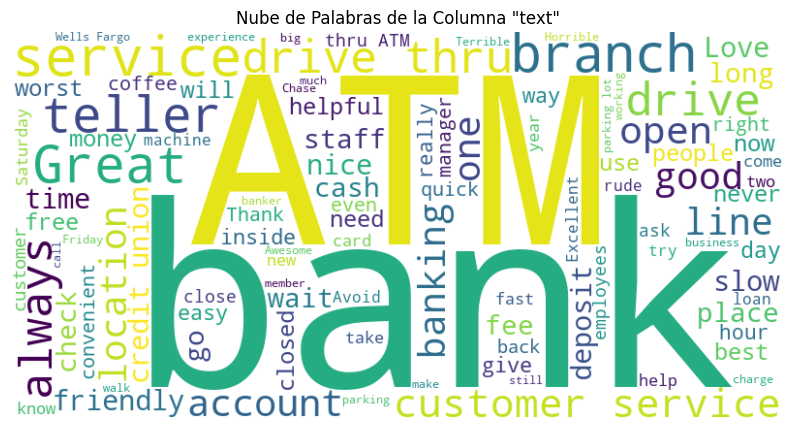

In [18]:

# Importa las bibliotecas necesarias
from wordcloud import WordCloud

# Concatena todos los textos de la columna 'text' en una sola cadena
all_text = ' '.join(df_tips['text'])

# Crea un objeto WordCloud con las configuraciones deseadas
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

# Configura la figura para mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de la Columna "text"')
plt.show()

# EDA "user.snappy.parquet"

In [19]:
#Obtener la ruta del archivo
file_path = '../data/Yelp/user.snappy.parquet'

# Lee el archivo Parquet en un DataFrame
df_user = pd.read_parquet(file_path, engine='pyarrow')
df_user.head(3)

,user_id,name,review_count,yelping_since,useful,funny,cool,friends,fans,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,IpLRJY4CP3fXtlEd8Y4GFQ,Robyn,518,2009-04-11,1325,450,348,"hdwDo7CLh9aN_9PckAos4Q, ci-mepWGgsgGT3sFI2mhMg...",35,2.95,...,4,2,7,1,35,17,20,20,20,6
1,2l0O1EI1m0yWjFo2zSt71w,Shiho,2837,2005-07-02,19237,9542,15235,"ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...",492,3.92,...,108,85,79,40,350,742,1070,1070,403,258
2,RgDVC3ZUBqpEe6Y1kPhIpw,Monica,1282,2009-02-23,12640,10005,11149,"sHozd2pcOKwHtPr8VlZJfg, 7mL9cvICl8fuCQTM89a-SA...",804,4.17,...,102,108,138,65,898,2584,1731,1731,551,177


## Exploración de la Distribución de Review Count y Average Stars:

Visualiza la distribución de review_count y average_stars para entender la cantidad de reseñas y la calificación promedio de los usuarios.

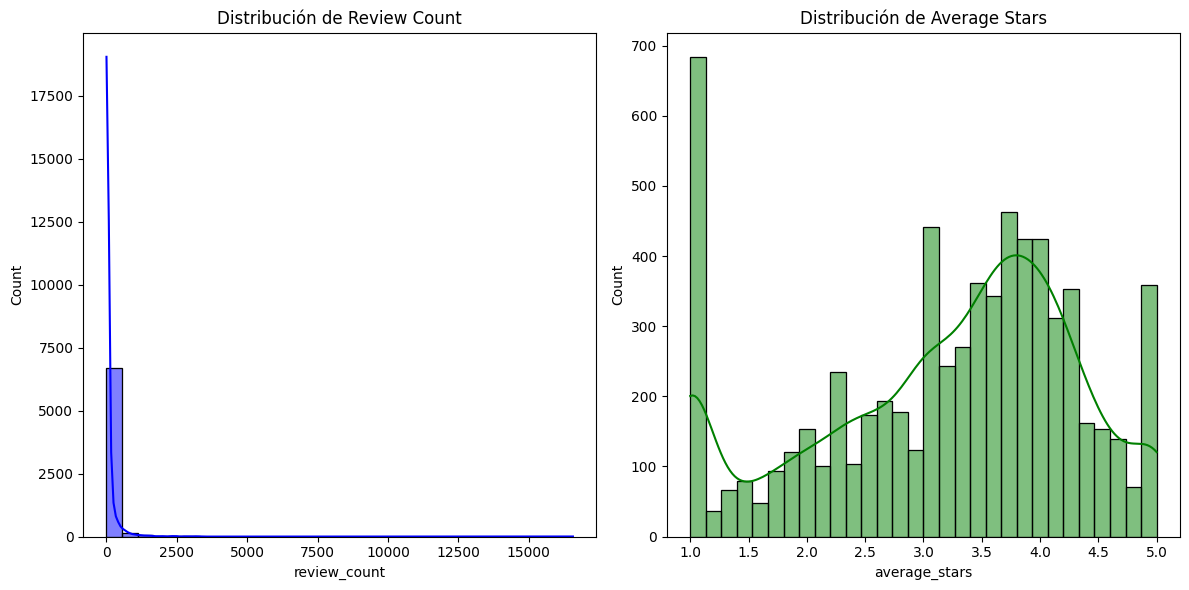

In [20]:
# Exploración de la Distribución de Review Count y Average Stars
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_user['review_count'], bins=30, kde=True, color='blue')
plt.title('Distribución de Review Count')

plt.subplot(1, 2, 2)
sns.histplot(df_user['average_stars'], bins=30, kde=True, color='green')
plt.title('Distribución de Average Stars')

plt.tight_layout()
plt.show()

## Análisis Temporal:

Analiza la distribución temporal de la variable yelping_since. Agrupar por año cómo ha evolucionado la incorporación de nuevos usuarios a lo largo del tiempo.

C:\Users\Admin\AppData\Local\Temp\ipykernel_33284\3514512616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='yelping_year', data=df_user, palette='viridis')


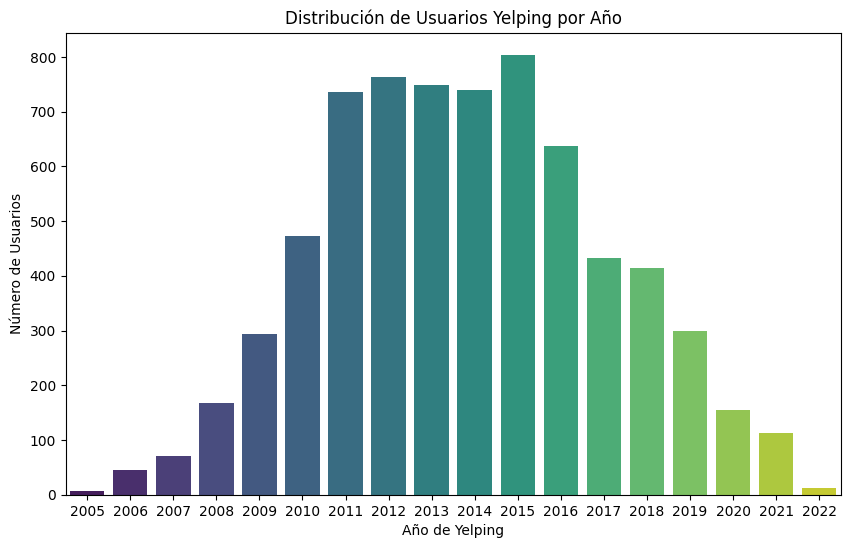

In [21]:
# Análisis Temporal
df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])
df_user['yelping_year'] = df_user['yelping_since'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(x='yelping_year', data=df_user, palette='viridis')
plt.title('Distribución de Usuarios Yelping por Año')
plt.xlabel('Año de Yelping')
plt.ylabel('Número de Usuarios')
plt.show()

## Análisis de Relaciones Sociales:

Investiga las relaciones sociales de los usuarios utilizando la información en la columna friends. Analizar la cantidad de amigos y cómo se distribuyen.

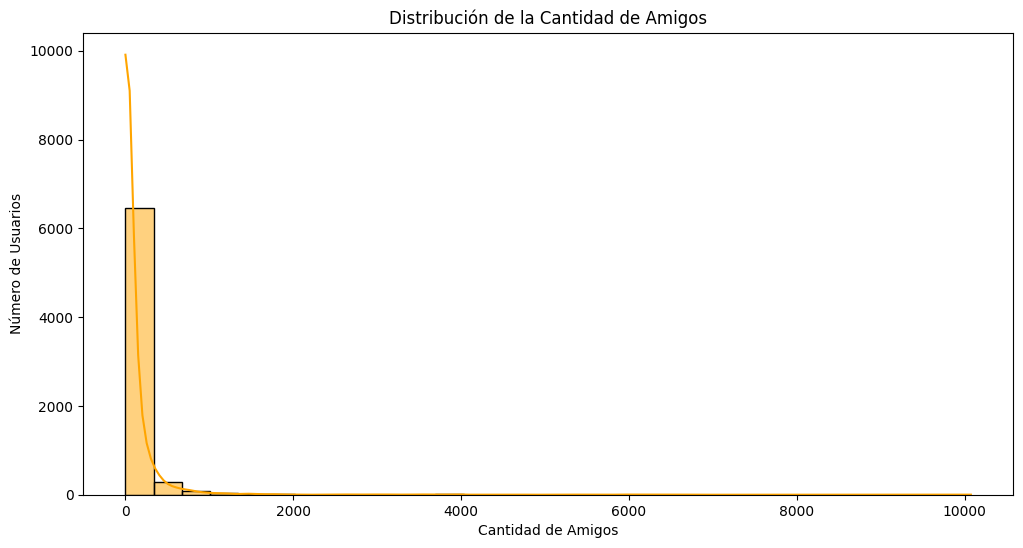

In [22]:
#Análisis de Relaciones Sociales
df_user['friends_count'] = df_user['friends'].apply(lambda x: len(x.split(',')))

plt.figure(figsize=(12, 6))
sns.histplot(df_user['friends_count'], bins=30, kde=True, color='orange')
plt.title('Distribución de la Cantidad de Amigos')
plt.xlabel('Cantidad de Amigos')
plt.ylabel('Número de Usuarios')
plt.show()
